### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [35]:
df = pd.read_csv('data/telco_churn_data.csv')

In [9]:
df.head()

Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0  8779-QRDMV                No                    0                 1   
1  7495-OOKFY               Yes                    1                 8   
2  1658-BYGOY                No                    0                18   
3  4598-XLKNJ               Yes                    1                25   
4  4846-WHAFZ               Yes                    1                37   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0     None            No                               0.00             No   
1  Offer E           Yes                              48.85            Yes   
2  Offer D           Yes                              11.33            Yes   
3  Offer C           Yes                              19.76             No   
4  Offer C           Yes                               6.33            Yes   

  Internet Service Internet Type  ...   Latitude   Longitude Population  \
0              Yes   Fiber Optic  ...  34.023810 -118.156582      68701   
1              Yes         Cable  ...  34.044271 -118.185237      55668   
2              Yes   Fiber Optic  ...  34.108833 -118.229715      47534   
3              Yes   Fiber Optic  ...  33.936291 -118.332639      27778   
4              Yes         Cable  ...  33.972119 -118.020188      26265   

  Churn Value  CLTV   Churn Category                  Churn Reason  \
0           1  5433       Competitor  Competitor offered more data   
1           1  5302       Competitor  Competitor made better offer   
2           1  3179       Competitor  Competitor made better offer   
3           1  5337  Dissatisfaction     Limited range of services   
4           1  2793            Price            Extra data charges   

  Total Customer Svc Requests Product/Service Issues Reported  \
0                           5                               0   
1                           5                               0   
2                           1                               0   
3                           1                               1   
4                           1                               0   

  Customer Satisfaction  
0                   NaN  
1                   NaN  
2                   NaN  
3                   2.0  
4                   2.0  

[5 rows x 46 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [16]:
# df.describe()

Number of Referrals  Tenure in Months  \
count          7043.000000       7043.000000   
mean              1.951867         32.386767   
std               3.001199         24.542061   
min               0.000000          1.000000   
25%               0.000000          9.000000   
50%               0.000000         29.000000   
75%               3.000000         55.000000   
max              11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                21.110890   
std                            15.448113                20.948471   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                28.000000   
max                            49.990000                94.000000   

       Monthly Charge  Total Regular Charges  Total Refunds  \
count     7043.000000            7043.000000    7043.000000   
mean        65.538800            2280.381264       1.962182   
std         30.606805            2266.220462       7.902614   
min         18.250000              18.800000       0.000000   
25%         35.890000             400.150000       0.000000   
50%         71.968000            1394.550000       0.000000   
75%         90.650000            3786.600000       0.000000   
max        123.084000            8684.800000      49.790000   

       Total Extra Data Charges  Total Long Distance Charges          Age  \
count               7043.000000                  7043.000000  7043.000000   
mean                 278.499225                   749.099262    46.509726   
std                  685.039625                   846.660055    16.750352   
min                    0.000000                     0.000000    19.000000   
25%                    0.000000                    70.545000    32.000000   
50%                    0.000000                   401.440000    46.000000   
75%                  182.620000                  1191.100000    60.000000   
max                 6477.000000                  3564.720000    80.000000   

       Number of Dependents      Zip Code     Latitude    Longitude  \
count           7043.000000   7043.000000  7043.000000  7043.000000   
mean               0.468692  93486.070567    36.197455  -119.756684   
std                0.962802   1856.767505     2.468929     2.154425   
min                0.000000  90001.000000    32.555828  -124.301372   
25%                0.000000  92101.000000    33.990646  -121.788090   
50%                0.000000  93518.000000    36.205465  -119.595293   
75%                0.000000  95329.000000    38.161321  -117.969795   
max                9.000000  96150.000000    41.962127  -114.192901   

          Population  Churn Value         CLTV  Total Customer Svc Requests  \
count    7043.000000  7043.000000  7043.000000                  7043.000000   
mean    22139.603294     0.265370  4400.295755                     1.338776   
std     21152.392837     0.441561  1183.057152                     1.430471   
min        11.000000     0.000000  2003.000000                     0.000000   
25%      2344.000000     0.000000  3469.000000                     0.000000   
50%     17554.000000     0.000000  4527.000000                     1.000000   
75%     36125.000000     1.000000  5380.500000                     2.000000   
max    105285.000000     1.000000  6500.000000                     9.000000   

       Product/Service Issues Reported  Customer Satisfaction  
count                      7043.000000            1834.000000  
mean                          0.308107               3.005453  
std                           0.717514               1.256938  
min                           0.000000               1.000000  
25%               

In [62]:
# create new customer id column & populate it w/ integers
# ids = list(range(7043))
# df.insert(loc=0, column='customer_id', value=ids)

# limit data set to. only columns of interest

# NOTE removed columns that generated too many upon conversion from string
# df = df[['Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Refunds', 'Gender', 'Age', 'Married', 'Number of Dependents', 'Latitude', 'Longitude', 'Population', 'Churn Reason', 'Total Customer Svc Requests', 'Product/Service Issues Reported']]
df = df[['Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Refunds', 'Gender', 'Age', 'Married', 'Number of Dependents', 'Latitude', 'Longitude', 'Population']]
df.head()

Tenure in Months Phone Service  Avg Monthly Long Distance Charges  \
0                 1            No                               0.00   
1                 8           Yes                              48.85   
2                18           Yes                              11.33   
3                25           Yes                              19.76   
4                37           Yes                               6.33   

  Multiple Lines Internet Service Internet Type  Avg Monthly GB Download  \
0             No              Yes   Fiber Optic                        9   
1            Yes              Yes         Cable                       19   
2            Yes              Yes   Fiber Optic                       57   
3             No              Yes   Fiber Optic                       13   
4            Yes              Yes         Cable                       15   

   Monthly Charge  Total Refunds  Gender  Age Married  Number of Dependents  \
0          41.236           0.00    Male   78      No                     0   
1          83.876           0.00  Female   74     Yes                     1   
2          99.268          45.61    Male   71      No                     3   
3         102.440          13.43  Female   78     Yes                     1   
4          79.560           0.00  Female   80     Yes                     1   

    Latitude   Longitude  Population  
0  34.023810 -118.156582       68701  
1  34.044271 -118.185237       55668  
2  34.108833 -118.229715       47534  
3  33.936291 -118.332639       27778  
4  33.972119 -118.020188       26265

In [76]:
# remove the strings
df_encoded = pd.get_dummies(df)
# df_encoded.info()
df_encoded.head()

Tenure in Months  Avg Monthly Long Distance Charges  \
0                 1                               0.00   
1                 8                              48.85   
2                18                              11.33   
3                25                              19.76   
4                37                               6.33   

   Avg Monthly GB Download  Monthly Charge  Total Refunds  Age  \
0                        9          41.236           0.00   78   
1                       19          83.876           0.00   74   
2                       57          99.268          45.61   71   
3                       13         102.440          13.43   78   
4                       15          79.560           0.00   80   

   Number of Dependents   Latitude   Longitude  Population  ...  \
0                     0  34.023810 -118.156582       68701  ...   
1                     1  34.044271 -118.185237       55668  ...   
2                     3  34.108833 -118.229715       47534  ...   
3                     1  33.936291 -118.332639       27778  ...   
4                     1  33.972119 -118.020188       26265  ...   

   Internet Service_No  Internet Service_Yes  Internet Type_Cable  \
0                    0                     1                    0   
1                    0                     1                    1   
2                    0                     1                    0   
3                    0                     1                    0   
4                    0                     1                    1   

   Internet Type_DSL  Internet Type_Fiber Optic  Internet Type_None  \
0                  0                          1                   0   
1                  0                          0                   0   
2                  0                          1                   0   
3                  0                          1                   0   
4                  0                          0                   0   

   Gender_Female  Gender_Male  Married_No  Married_Yes  
0              0            1           1            0  
1              1            0           0            1  
2              0            1           1            0  
3              1            0           0            1  
4              1            0           0            1  

[5 rows x 24 columns]

In [72]:
# scaler = StandardScaler()
# scaler.fit(df_encoded)
# scaled_df = scaler.transform(df_encoded)
# principal = PCA()
# principal.fit(scaled_df)
# pca_df = principal.transform(scaled_df)

# principal.explained_variance_ratio_
pca = PCA()
components = pca.fit_transform(df_encoded)
# print(pca.explained_variance_ratio_)
print(pca.n_features_)
# print(components)
print(pca.feature_names_in_)
print(pca.n_components_)
# source: https://plotly.com/python/pca-visualization/
# labels = {
#     str(i): f"PC {i+1} ({var:.1f}%)"
#     for i, var in enumerate(pca.explained_variance_ratio_ * 100)
# }

# fig = px.scatter_matrix(
#     components,
#     labels=labels,
#     dimensions=range(df_encoded.shape[1]),
#     color=df["Population"]
# )
# fig.update_traces(diagonal_visible=False)
# fig.show()

24
['Tenure in Months' 'Avg Monthly Long Distance Charges'
 'Avg Monthly GB Download' 'Monthly Charge' 'Total Refunds' 'Age'
 'Number of Dependents' 'Latitude' 'Longitude' 'Population'
 'Phone Service_No' 'Phone Service_Yes' 'Multiple Lines_No'
 'Multiple Lines_Yes' 'Internet Service_No' 'Internet Service_Yes'
 'Internet Type_Cable' 'Internet Type_DSL' 'Internet Type_Fiber Optic'
 'Internet Type_None' 'Gender_Female' 'Gender_Male' 'Married_No'
 'Married_Yes']
24


/Users/maspen/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



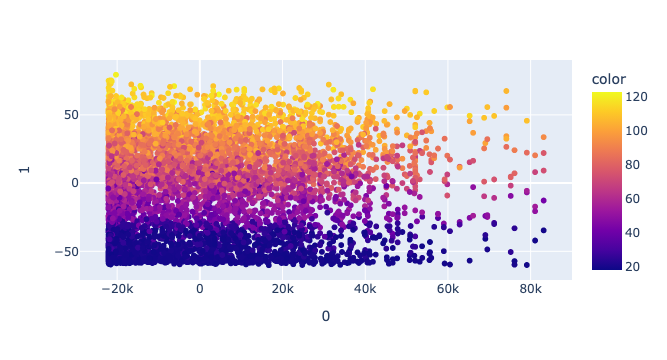

In [73]:
# plot of 2 highest variance ratios
# x = Tenure in Months
# y = Avg Monthly Long Distance Charges
fig = px.scatter(components, x=0, y=1, color=df_encoded['Monthly Charge'])
fig.show()

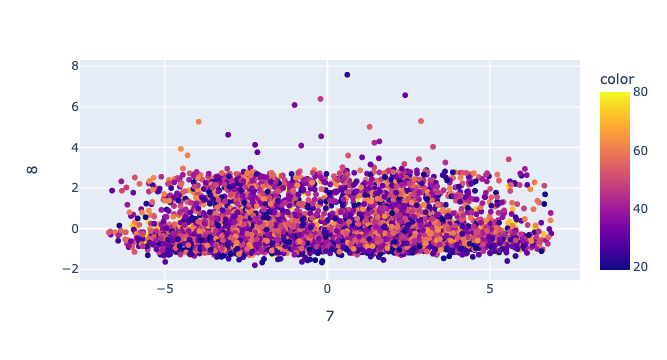

In [74]:
# 7 - Latitude
# 8 - Longitude

fig = px.scatter(components, x=7, y=8, color=df_encoded['Age'])
fig.show()

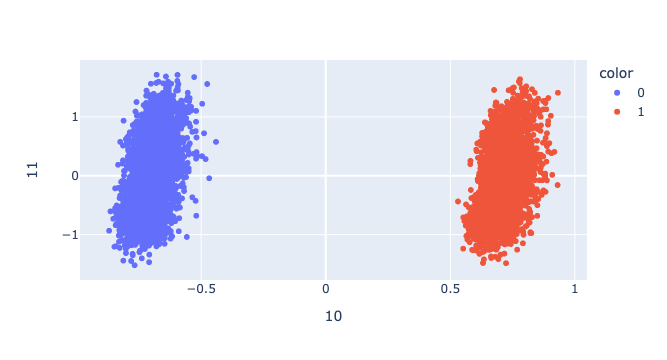

In [75]:
# 10 - 'Phone Service_No'
# 11 - Phone Service_Yes'
# 'Gender_Female' - 1 == yes, 0 == no
fig = px.scatter(components, x=10, y=11, color=df_encoded['Gender_Female'])
fig.show()

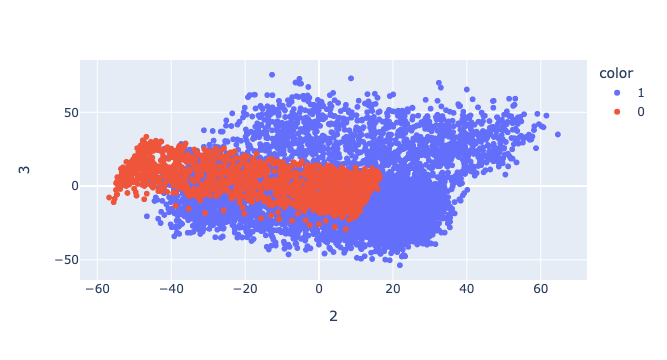

In [78]:
# 2 - 'Avg Monthly GB Download' 
# 3 - 'Monthly Charge'
# 'Internet Service_Yes' - 1 == yes, 0 == no
fig = px.scatter(components, x=2, y=3, color=df_encoded['Internet Service_Yes'])
fig.show()

/Users/maspen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/maspen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/maspen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/maspen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/maspen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans

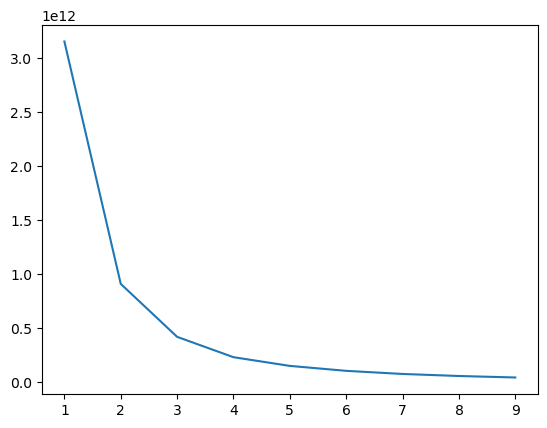

In [91]:
# kmeans

sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++').fit(df_encoded)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))

In [98]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(df_encoded)
df_encoded['clusters'] = kmeans.labels_
# df_encoded.head()

/Users/maspen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



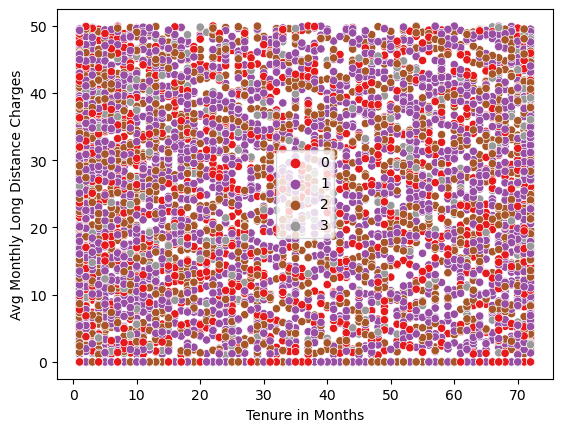

In [99]:
def myscatter(data, x_label, y_label, hue_assign):
    sns.scatterplot(data=data, x=x_label, y=y_label, hue=hue_assign,
                    palette=sns.color_palette('Set1', as_cmap=True))

                    
# x = 'Tenure in Months'
# y = 'Avg Monthly Long Distance Charges'
X = df_encoded
myscatter(X, 'Tenure in Months', 'Avg Monthly Long Distance Charges', kmeans.labels_)

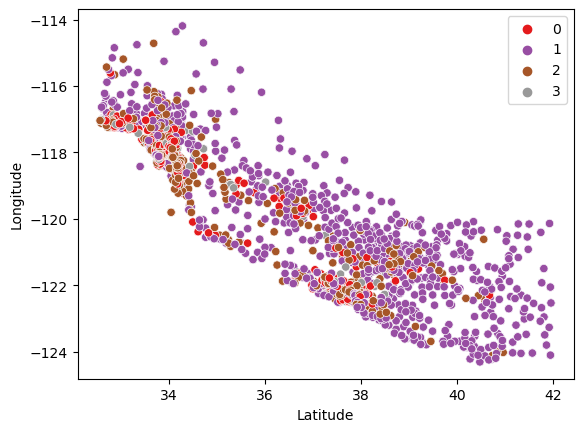

In [100]:
# 7 - Latitude
# 8 - Longitude
myscatter(X, 'Latitude', 'Longitude', kmeans.labels_)

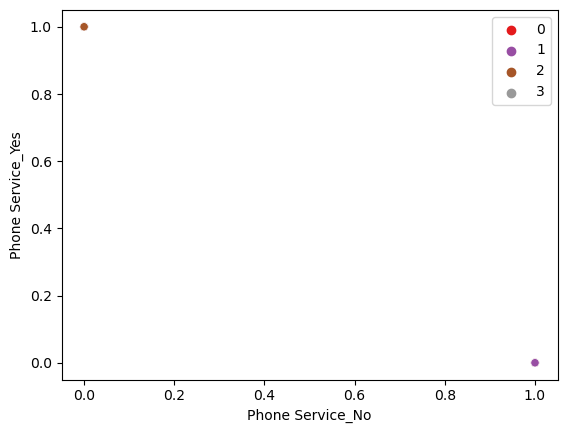

In [102]:
# 10 - 'Phone Service_No'
# 11 - Phone Service_Yes'
myscatter(X, 'Phone Service_No', 'Phone Service_Yes', kmeans.labels_)

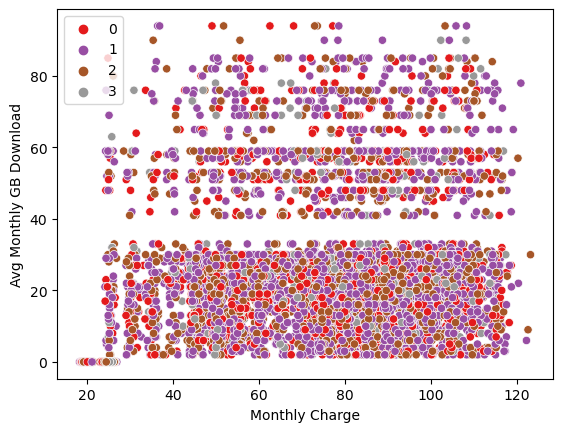

In [104]:
# 2 - 'Avg Monthly GB Download' 
# 3 - 'Monthly Charge'
myscatter(X, 'Monthly Charge', 'Avg Monthly GB Download', kmeans.labels_)

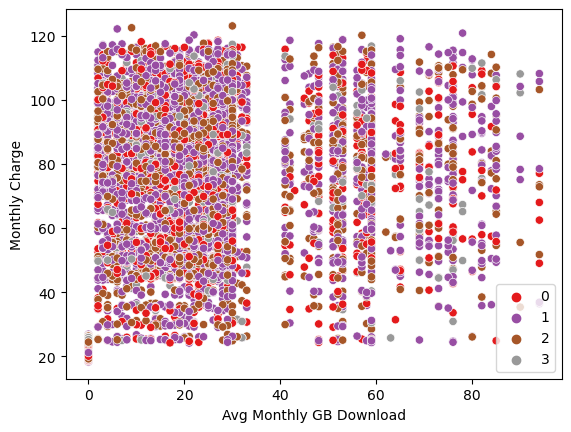

In [105]:
myscatter(X, 'Avg Monthly GB Download', 'Monthly Charge', kmeans.labels_)

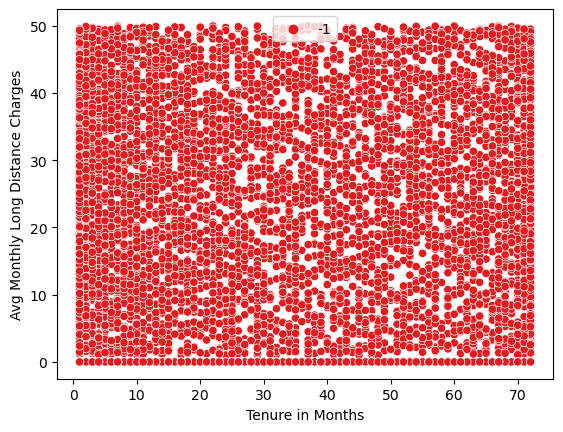

In [108]:
# DBSCAN

dbscan = DBSCAN(eps=9, min_samples=3).fit(X)


# x = 'Tenure in Months'
# y = 'Avg Monthly Long Distance Charges'
myscatter(X, 'Tenure in Months', 'Avg Monthly Long Distance Charges', dbscan.labels_)

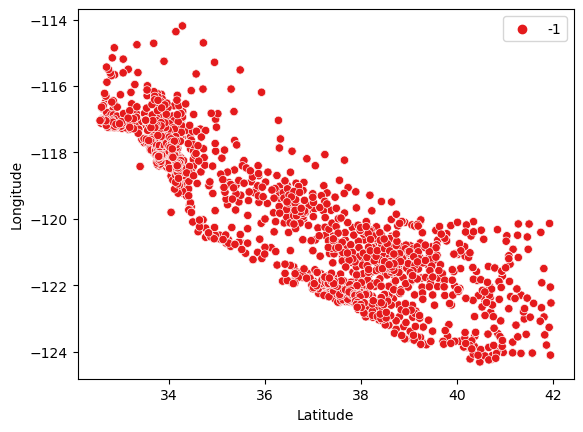

In [109]:
# 7 - Latitude
# 8 - Longitude
myscatter(X, 'Latitude', 'Longitude', dbscan.labels_)

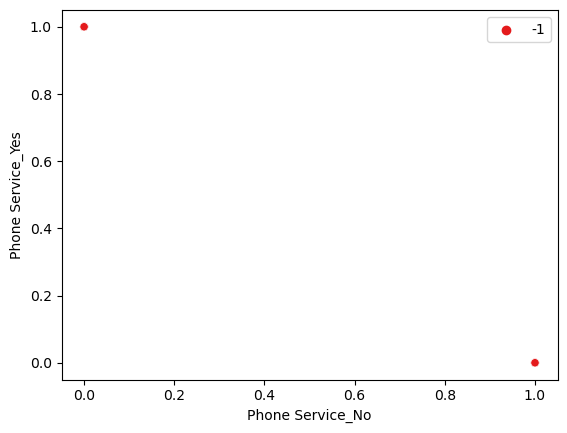

In [110]:
# 10 - 'Phone Service_No'
# 11 - Phone Service_Yes'
myscatter(X, 'Phone Service_No', 'Phone Service_Yes', dbscan.labels_)

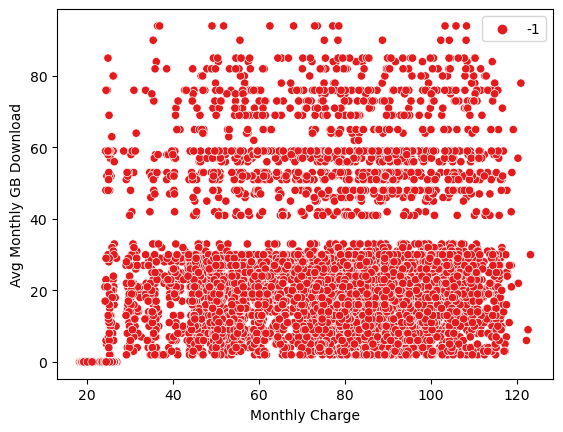

In [112]:
myscatter(X, 'Monthly Charge', 'Avg Monthly GB Download', dbscan.labels_)